**Корректность проверена на Python 3.7:**
+ pandas 0.23.0
+ numpy 1.14.5
+ scipy 1.1.0

# Критерий согласия Пирсона ( $\chi^2$)

In [1]:
import numpy as np
import pandas as pd

from scipy import stats

In [30]:
import scipy
print(np.__version__)
print(pd.__version__)
print(scipy.__version__)

%pylab inline



1.16.2
0.24.2
1.2.1
Populating the interactive namespace from numpy and matplotlib


## Исчерпанная рождаемость

Исчерпанная рождаемость — количество детей, родившихся у женщины на момент окончания конвенционального репродуктивного возраста (45 лет). Для 1878 женщин старше 45, участвовавших в социологическом опросе жителей Швейцарии, известно количество детей. Этот признак — типичный счётчик, а, значит, его можно попробовать описать распределением Пуассона.

* **выборка** - целочисленный вектор длиы $n$, характеризующий количество детей у опрашиваемой женщины
* **гипотеза $H_0$** - рассматриваемая величина имеет распределение Пуассона

In [28]:
fin = open('fertility.txt', 'r')
data = list(map(lambda x: int(x.strip()), fin.readlines())) 
# убрали все кроме значений (проблемы /пропусуки и так далее)

In [29]:
data[:20]

max(data)

11

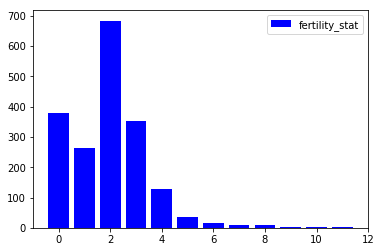

In [13]:
pylab.bar(range(12), np.bincount(data), color = 'b', label = 'fertility_stat')
pylab.legend()

In [14]:
l = np.mean(data)
l
# найдем лямбду для распределения пуассона (оптимальная лямбла  - выборочное среднее)

1.93716719914803

## Критерий согласия

In [21]:
observed_frequences = np.bincount(data) # бинкаунт считает число значения в списке
observed_frequences

array([379, 262, 684, 353, 128,  35,  16,   8,  10,   1,   1,   1],
      dtype=int64)

Мы получили целочисленный вектор, где каждая компонента характеризует, сколько раз данное количество детей встретилось

In [22]:
expected_frequences = [len(data)*stats.poisson.pmf(x, l) for x in range(min(data), max(data) + 1)]
expected_frequences
# если данные распределены с распределением Пуассона

[270.6416065637888,
 524.2780429600978,
 507.80711402791167,
 327.9024282629646,
 158.80045713800124,
 61.52460735548975,
 19.863908551586047,
 5.49710172757265,
 1.3311006446292126,
 0.28650716750450117,
 0.055501228721053016,
 0.009774105435530582]

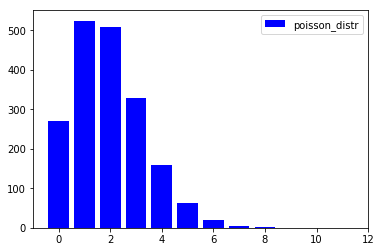

In [23]:
pylab.bar(range(len(expected_frequences)), expected_frequences, color = 'b', label = 'poisson_distr')
pylab.legend()

Статистика критерия хи-квадрат: $$\chi^2=\sum_{i=1}^K \frac{\left(n_i- np_i\right)^2}{np_i}$$
При справедливости нулевой гипотезы имеет распределение хи-квадрат с числом степеней свободы $K-1-m$, где $m$ - число параметров распределения, оцененных по выборке.

In [27]:
stats.chisquare(observed_frequences, expected_frequences, ddof = 1)

Power_divergenceResult(statistic=431.5752205284916, pvalue=1.772613180233512e-86)

**p value сильно близко к нулю, значит мы отвергаем нулевую гипотизу  - сл. велична не имеет распределение Пуассона**

**The Wage Tract — заповедник в округе Тома, Джорджия, США, деревья в котором не затронуты деятельностью человека со времён первых поселенцев. Для участка заповедника размером 200х200 м имеется информация о координатах сосен (sn — координата в направлении север-юг, we — в направлении запад-восток, обе от 0 до 200).**

Проверим, можно ли пространственное распределение сосен считать равномерным, или они растут кластерами.

Загрузите данные, поделите участок на 5х5 одинаковых квадратов размера 40x40 м, посчитайте количество сосен в каждом квадрате (чтобы получить такой же результат, как у нас, используйте функцию scipy.stats.binned_statistic_2d).

Если сосны действительно растут равномерно, какое среднее ожидаемое количество сосен в каждом квадрате? В правильном ответе два знака после десятичной точки.

In [86]:
import pandas as pd

In [91]:
pines=pd.read_csv('pines.txt',sep='\t')

In [92]:
pines.head()

,sn,we
0,200.0,8.8
1,199.3,10.0
2,193.6,22.4
3,167.7,35.6
4,183.9,45.4


In [99]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

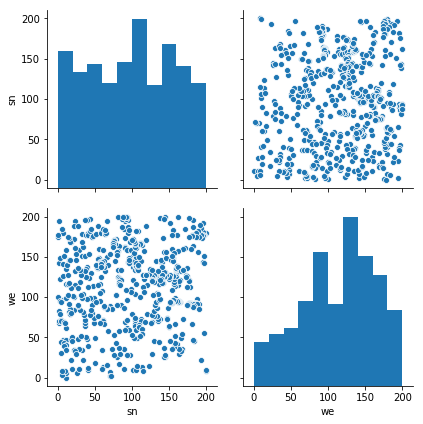

In [101]:
sns.pairplot(pines,size=3)
# уже видна неравномерность.

In [106]:
bins=scipy.stats.binned_statistic_2d (x=pines.sn, y=pines.we, values=None, statistic='count', bins=[5,5], range=None, expand_binnumbers=False)

In [107]:
bins.statistic

array([[18., 26., 29., 25., 20.],
       [14., 12., 22., 34., 25.],
       [12., 24., 15., 50., 37.],
       [ 8., 19., 31., 50.,  7.],
       [ 7.,  8., 37., 27., 27.]])

Если сосны действительно растут равномерно, какое среднее ожидаемое количество сосен в каждом квадрате? В правильном ответе два знака после десятичной точки.

In [111]:
sum(bins.statistic)/25


23.36

**Чтобы сравнить распределение сосен с равномерным, посчитайте значение статистики хи-квадрат для полученных 5х5 квадратов. Округлите ответ до двух знаков после десятичной точки**

In [108]:
from scipy import stats

In [109]:
bins.statistic.flatten()
# в один список. далее сравним с норм распределением 

array([18., 26., 29., 25., 20., 14., 12., 22., 34., 25., 12., 24., 15.,
       50., 37.,  8., 19., 31., 50.,  7.,  7.,  8., 37., 27., 27.])

In [124]:
stats.chisquare(bins.statistic.flatten(),sum(bins.statistic)/25, ddof = 0)

Power_divergenceResult(statistic=150.58904109589042, pvalue=2.574669774967279e-20)